### Notebook to generate a figure that shows a belief state being updated after a trial with some chosen card and response

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import utils.behavioral_utils as behavioral_utils
import utils.visualization_utils as visualization_utils

import utils.spike_utils as spike_utils
import utils.io_utils as io_utils
import os
from distutils.util import strtobool

import argparse
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from constants.behavioral_constants import *

from scipy import stats
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import pandas as pd


In [2]:
sub = "SA"
SESSIONS_PATH = "/data/patrick_res/sessions/{sub}/valid_sessions.pickle"
session = 20180802
beh = behavioral_utils.get_valid_belief_beh_for_sub_sess(sub, session)


In [3]:
beh

,TrialNumber,BlockNumber,TrialAfterRuleChange,TaskInterrupt,ConditionNumber,Response,ItemChosen,TrialType,CurrentRule,LastRule,...,BeliefStateValueBin,PreferredBelief,PreferredBeliefProb,BeliefStateValueLabel,PreferredChosen,PrevResponse,PrevColor,PrevShape,PrevPattern,session
1,36,2,1,NaN,627,Incorrect,3.0,8,CIRCLE,CYAN,...,0,CIRCLE,0.097528,Low,False,Incorrect,YELLOW,SQUARE,ESCHER,20180802
2,37,2,2,NaN,808,Incorrect,3.0,8,CIRCLE,CYAN,...,0,CIRCLE,0.110206,Low,False,Incorrect,MAGENTA,SQUARE,POLKADOT,20180802
3,38,2,3,NaN,783,Incorrect,1.0,8,CIRCLE,CYAN,...,0,GREEN,0.122767,Low,False,Incorrect,CYAN,SQUARE,SWIRL,20180802
4,39,2,4,NaN,1116,Incorrect,1.0,8,CIRCLE,CYAN,...,0,GREEN,0.134841,Low,False,Incorrect,CYAN,TRIANGLE,ESCHER,20180802
5,40,2,5,NaN,1113,Incorrect,1.0,8,CIRCLE,CYAN,...,0,GREEN,0.139775,Low,False,Incorrect,CYAN,TRIANGLE,POLKADOT,20180802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,1738,54,31,NaN,4072,Correct,0.0,7,GREEN,CYAN,...,1,GREEN,0.697813,High GREEN,True,Correct,GREEN,TRIANGLE,RIPPLE,20180802
1703,1739,54,32,NaN,4429,Correct,0.0,7,GREEN,CYAN,...,1,GREEN,0.701873,High GREEN,True,Correct,GREEN,TRIANGLE,RIPPLE,20180802
1704,1740,54,33,NaN,4457,Correct,0.0,7,GREEN,CYAN,...,1,GREEN,0.740497,High GREEN,True,Correct,GREEN,STAR,SWIRL,20180802
1705,1741,54,34,NaN,4380,Correct,0.0,7,GREEN,CYAN,...,1,GREEN,0.745288,High GREEN,True,Correct,GREEN,STAR,SWIRL,20180802


In [4]:
# trial = beh[beh.TrialAfterRuleChange == 0].iloc[0]
# next_trial = beh[beh.TrialNumber == 58].iloc[0]
def get_probs(trials):
    probs = trials.melt(id_vars=["TrialNumber"], value_vars=[f"{feat}Prob" for feat in FEATURES], var_name="feat", value_name="prob")
    probs["feat"] = probs["feat"].apply(lambda x: x[:-4])
    return probs

cor_trials = beh[beh.TrialNumber.isin([72, 73])]
cor_probs = get_probs(cor_trials)

inc_trials = beh[beh.TrialNumber.isin([95, 96])]
inc_probs = get_probs(inc_trials)



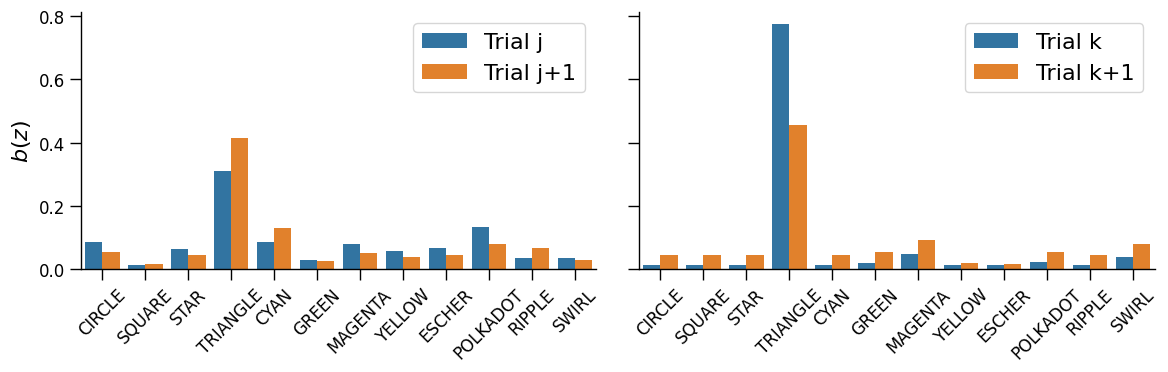

In [7]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# palette = {72: "lightgray", 73: "dimgray"}

sns.barplot(cor_probs, x="feat", y="prob", hue="TrialNumber", ax=ax1)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlabel('')
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['Trial j','Trial j+1'], title=None)
ax1.set_ylabel(r'$b(z)$')


sns.barplot(inc_probs, x="feat", y="prob", hue="TrialNumber", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_xlabel('')
ax2.set_ylabel('')
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=['Trial k','Trial k+1'], title=None)

visualization_utils.format_plot([ax1, ax2], axislabelsize=16)
fig.tight_layout()
fig.savefig("/data/patrick_res/figures/wcst_paper/behavior/belief_update_description.svg")


In [13]:
beh[beh.TrialNumber == 95][["Color", "Shape", "Pattern"]]

,Color,Shape,Pattern
60,YELLOW,TRIANGLE,ESCHER
